In [1]:
import pandas as pd

raw_data1 = pd.read_csv('datasets/Admission_Predict_Ver1.1.csv')
raw_data2 = pd.read_csv('datasets/Admission_Predict.csv')

In [2]:
raw_data1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
raw_data1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


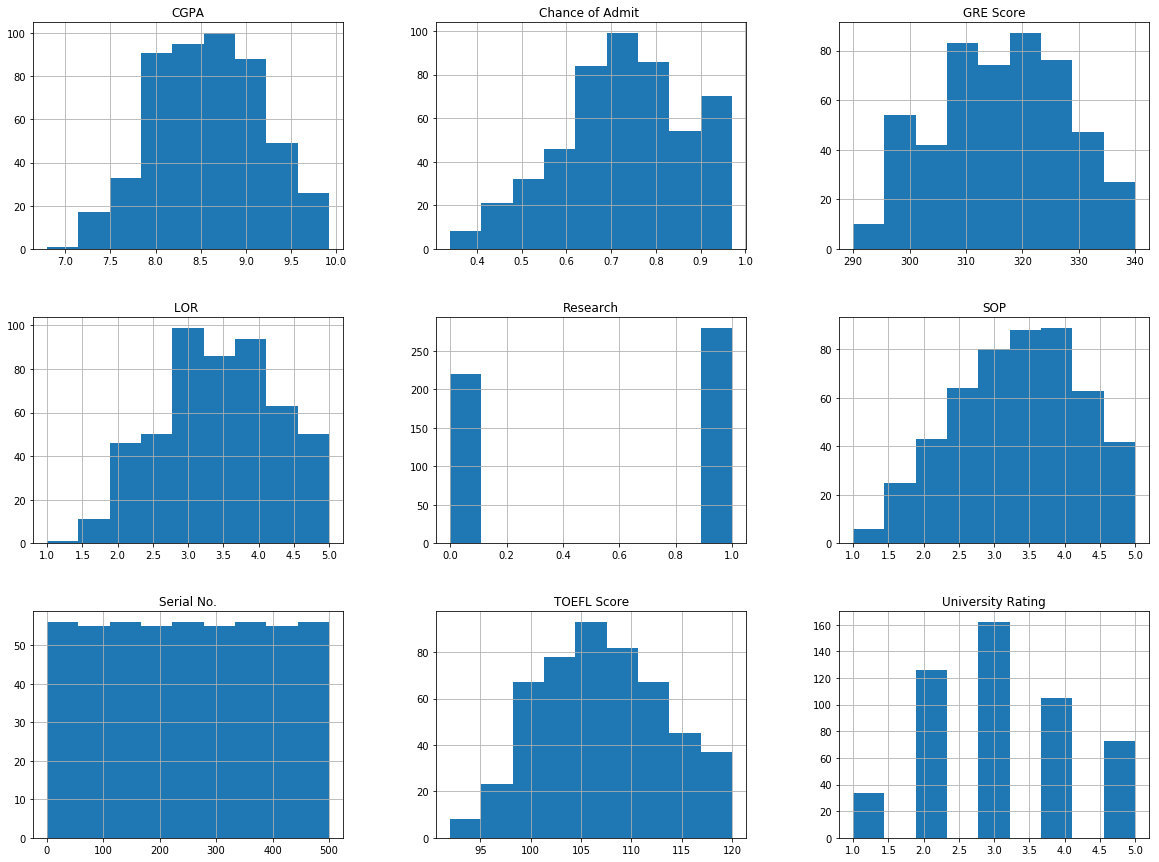

In [5]:
%matplotlib inline
# frequency plot
import matplotlib.pyplot as plt
raw_data1.hist(bins = 9, figsize = (20,15))
plt.show()

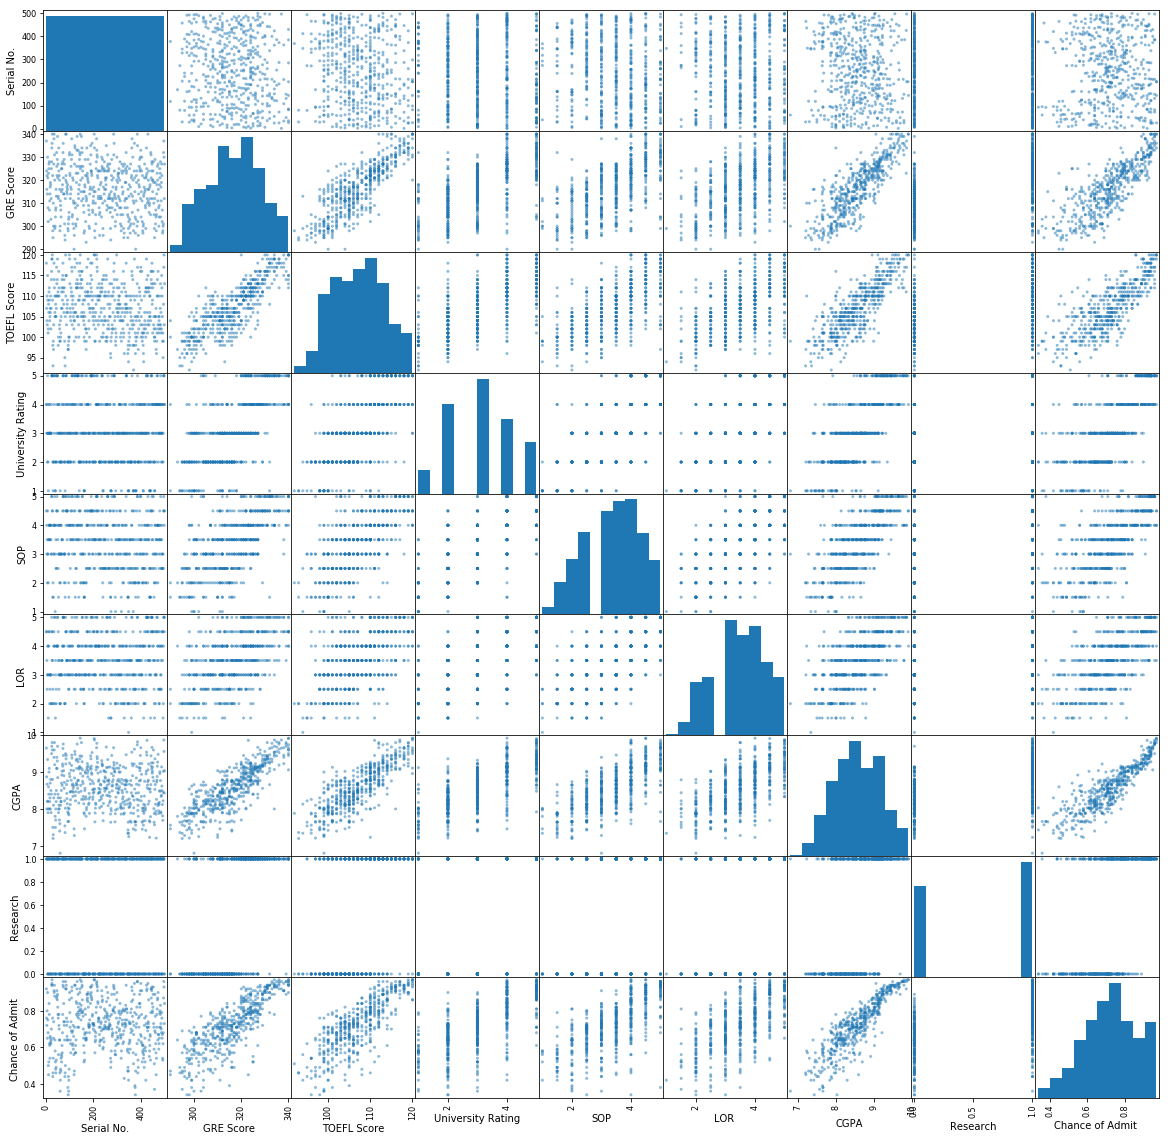

In [6]:
from pandas.plotting import scatter_matrix

# Can select attributes we are interested
attributes = ["age", "sex", "cp","chol"]
scatter_matrix(raw_data1, figsize=(20, 20))
plt.show()

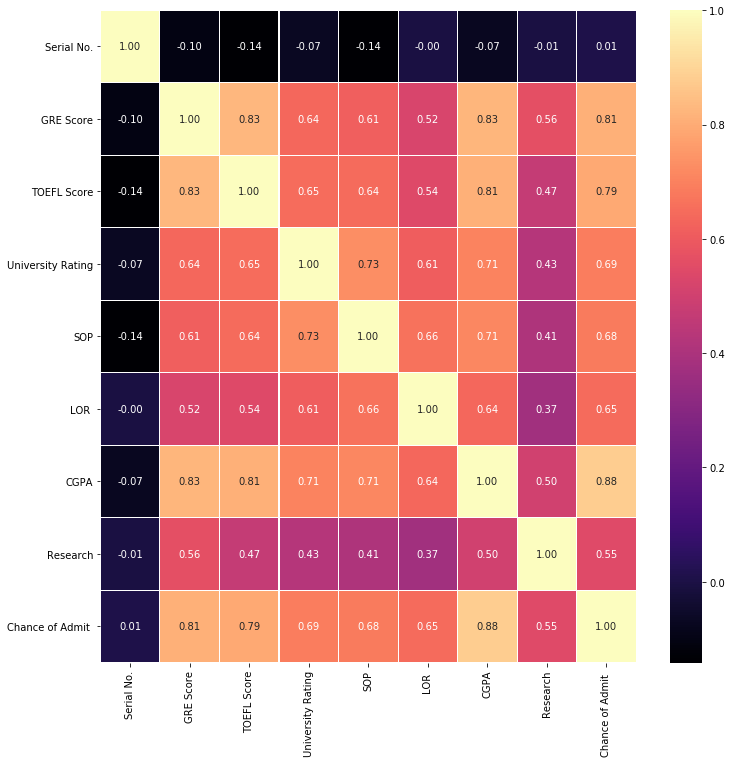

In [7]:
import seaborn as sn

# plot correlation matrix
plt.figure(figsize=(12, 12))
sn.heatmap(raw_data1.corr(), annot=True,linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()

In [8]:
raw_dropped = raw_data1.drop(labels='Serial No.',axis=1)
X_dataset = raw_dropped.drop(labels='Chance of Admit ',axis=1)
y_dataset = raw_dropped['Chance of Admit ']
raw_dropped.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X_dataset_norm=MinMaxScaler().fit_transform(X_dataset)
y_dataset_norm=MinMaxScaler().fit_transform(np.array(y_dataset).reshape(-1, 1))

c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
X_dataset_norm[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        ])

In [11]:
y_dataset_norm[0]

array([0.92063492])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataset_norm, y_dataset_norm, test_size = 0.20, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.8050068509073267

In [15]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,predicted))

r_square score:  0.8188432567829629
